In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression

In [15]:
data=pd.read_csv('pima-indians-diabetes.csv')

In [16]:
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
X = data[['Preg', 'Plas', 'skin']]
y = data['Pres']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [43]:
#create a Logistic Regression Model

lr = LogisticRegression()

In [44]:
lr.fit(X_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred = lr.predict(X_test)

In [46]:
#Evaluate the models accuracy

accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.09523809523809523


# Decision Tree

In [50]:
# Separate the features (p) and the target variable (q)

p = data[['Plas', 'age', 'skin']]
q = data['Preg']

In [51]:
# Split the data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(p,q, test_size=0.3)

In [52]:
# Create a decision tree classifier

dt = DecisionTreeClassifier()

In [53]:
# Train the decision tree on the training data

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
# Make predictions on the test set

y_pred1=dt.predict(x_test)

In [57]:
# Evaluate the model's accuracy

accuracy1 = accuracy_score(y_test,y_pred1)
print("Accuracy:",accuracy1)

Accuracy: 0.14285714285714285


# Linear Regression

In [74]:
a = data[['Preg','skin','mass']]
b = data['age']

In [75]:
x_train,x_test,y_train,y_test = train_test_split(a,b,test_size=0.3)

In [76]:
model = LinearRegression()

In [77]:
model.fit(x_train,y_train)

LinearRegression()

In [78]:
y_pred2=model.predict(x_test)

In [79]:
mse=mean_squared_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2)

In [80]:
print("Mean Squared Error:",mse)
print("R2 Score:",r2)

Mean Squared Error: 85.63407236094551
R2 Score: 0.2937599942301061


# Correlation 

In [82]:
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [83]:
# Calculate the correlation coefficient

correlation = data['Plas'].corr(data['age'])

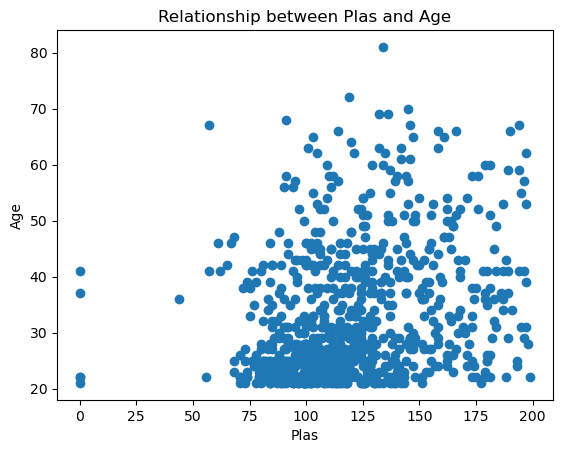

In [89]:
# Visualize the relationship

plt.scatter(x=data['Plas'],y=data['age'])
plt.xlabel('Plas')
plt.ylabel('Age')
plt.title('Relationship between Plas and Age')
plt.show()

In [90]:
# Print the correlation coefficient

print('Correlation is :',correlation)

Correlation is : 0.26351431982433354


# Data Mapping

In [91]:
data1=pd.read_csv('Pokemon.csv')

In [92]:
data1.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [93]:
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [105]:
# Define the mapping dictionary

mapping = {
    'Preg':'Attack',
    'Plas':'HP',
    'skin':'Sp. Atk'    
    
}

In [106]:
# Map and merge the datasets

mapped_data = pd.merge(data,data1, left_on='Preg',right_on='Attack')

In [107]:
# Select the desired columns

selected_columns = ['Preg','Plas','skin']
mapped_data = mapped_data[selected_columns]

In [108]:
# Print the mapped and merged dataset

print(mapped_data)

     Preg  Plas  skin
0       5   116     0
1       5   116     0
2       5   166    19
3       5   166    19
4       5   117     0
..    ...   ...   ...
182    10    94    18
183    10   101    48
184    10   101    48
185    10   101    48
186    15   136    32

[187 rows x 3 columns]


# Data Blending 

In [109]:
# 1st load 2 data sets as we have data & data1

In [116]:
data1=data1.rename(columns={'Generation':'class'})

# Confirm that you have atleast one same column name in both the dataset, 
#as I have renamed the 'Generation' column as a 'class' in another dataset.

In [117]:
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [115]:
data1.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,class,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [112]:
# Perform data blending based on a common key

merged_data = pd.merge(data,data1, on = 'class')

In [113]:
merged_data

,Preg,Plas,Pres,skin,test,mass,pedi,age,class,#,...,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,6,148,72,35,0,33.6,0.627,50,1,1,...,Grass,Poison,318,45,49,49,65,65,45,False
1,6,148,72,35,0,33.6,0.627,50,1,2,...,Grass,Poison,405,60,62,63,80,80,60,False
2,6,148,72,35,0,33.6,0.627,50,1,3,...,Grass,Poison,525,80,82,83,100,100,80,False
3,6,148,72,35,0,33.6,0.627,50,1,3,...,Grass,Poison,625,80,100,123,122,120,80,False
4,6,148,72,35,0,33.6,0.627,50,1,4,...,Fire,NaN,309,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44483,1,126,60,0,0,30.1,0.349,47,1,149,...,Dragon,Flying,600,91,134,95,100,100,80,False
44484,1,126,60,0,0,30.1,0.349,47,1,150,...,Psychic,NaN,680,106,110,90,154,90,130,True
44485,1,126,60,0,0,30.1,0.349,47,1,150,...,Psychic,Fighting,780,106,190,100,154,100,130,True
44486,1,126,60,0,0,30.1,0.349,47,1,150,...,Psychic,NaN,780,106,150,70,194,120,140,True


# Random Forest

In [118]:
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [119]:
# Separate the features and target variable

c = data.drop('Pres', axis=1)
d = data['Pres']

In [120]:
x_train,x_test,y_train,y_test = train_test_split(c,d, test_size=0.3)

In [128]:
#We create an instance of the Random Forest classifier with n_estimators=100, 
#indicating the number of decision trees to be used in the ensemble.

rf = RandomForestClassifier(n_estimators=100)

In [129]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [130]:
y_pred3 = rf.predict(x_test)

In [131]:
accuracy2 = accuracy_score(y_test,y_pred3)

In [132]:
print('Accuracy :',accuracy2)

Accuracy : 0.06926406926406926
